In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np # Algebra linéaire et calculs
import sklearn
from sklearn.preprocessing import LabelEncoder # Données categoriques vers numériques
from sklearn.model_selection import train_test_split # Decoupage en training et testing
from sklearn.metrics import accuracy_score # Calcul de la precision d’un modèle
from sklearn.impute import KNNImputer # Imputation de valeurs avec K-PP voisins
from sklearn.neighbors import KNeighborsClassifier # Classification K-PP voisins
from sklearn.linear_model import LinearRegression # Regression linéaire
from sklearn.ensemble import RandomForestRegressor # Regression Random Forest
from sklearn.ensemble import RandomForestClassifier # Classifieur Random Forest
from sklearn.metrics import mean_squared_error # Performance des modèles de regression
from sklearn.impute import SimpleImputer # Imputation de valeurs manquantes avec une stratégie simple
from xgboost import XGBClassifier #

data = pd.read_csv("../donnees/heart_disease_uci.csv")

print(data.isnull().sum())


id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [8]:
def missing_values(df):
    # Total missing values
    mis_val = df.isnull().sum()
    # Percentage
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
    mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
    "There are " + str(mis_val_table_ren_columns.shape[0]) +
    " columns that have missing values.")
    # Return the dataframe with missing information
    return mis_val_table_ren_columns
missing_values_table = missing_values(data)
print(missing_values_table)

Your selected dataframe has 16 columns.
There are 10 columns that have missing values.
          Missing Values  % of Total Values
ca                   611               66.4
thal                 486               52.8
slope                309               33.6
fbs                   90                9.8
oldpeak               62                6.7
trestbps              59                6.4
thalch                55                6.0
exang                 55                6.0
chol                  30                3.3
restecg                2                0.2


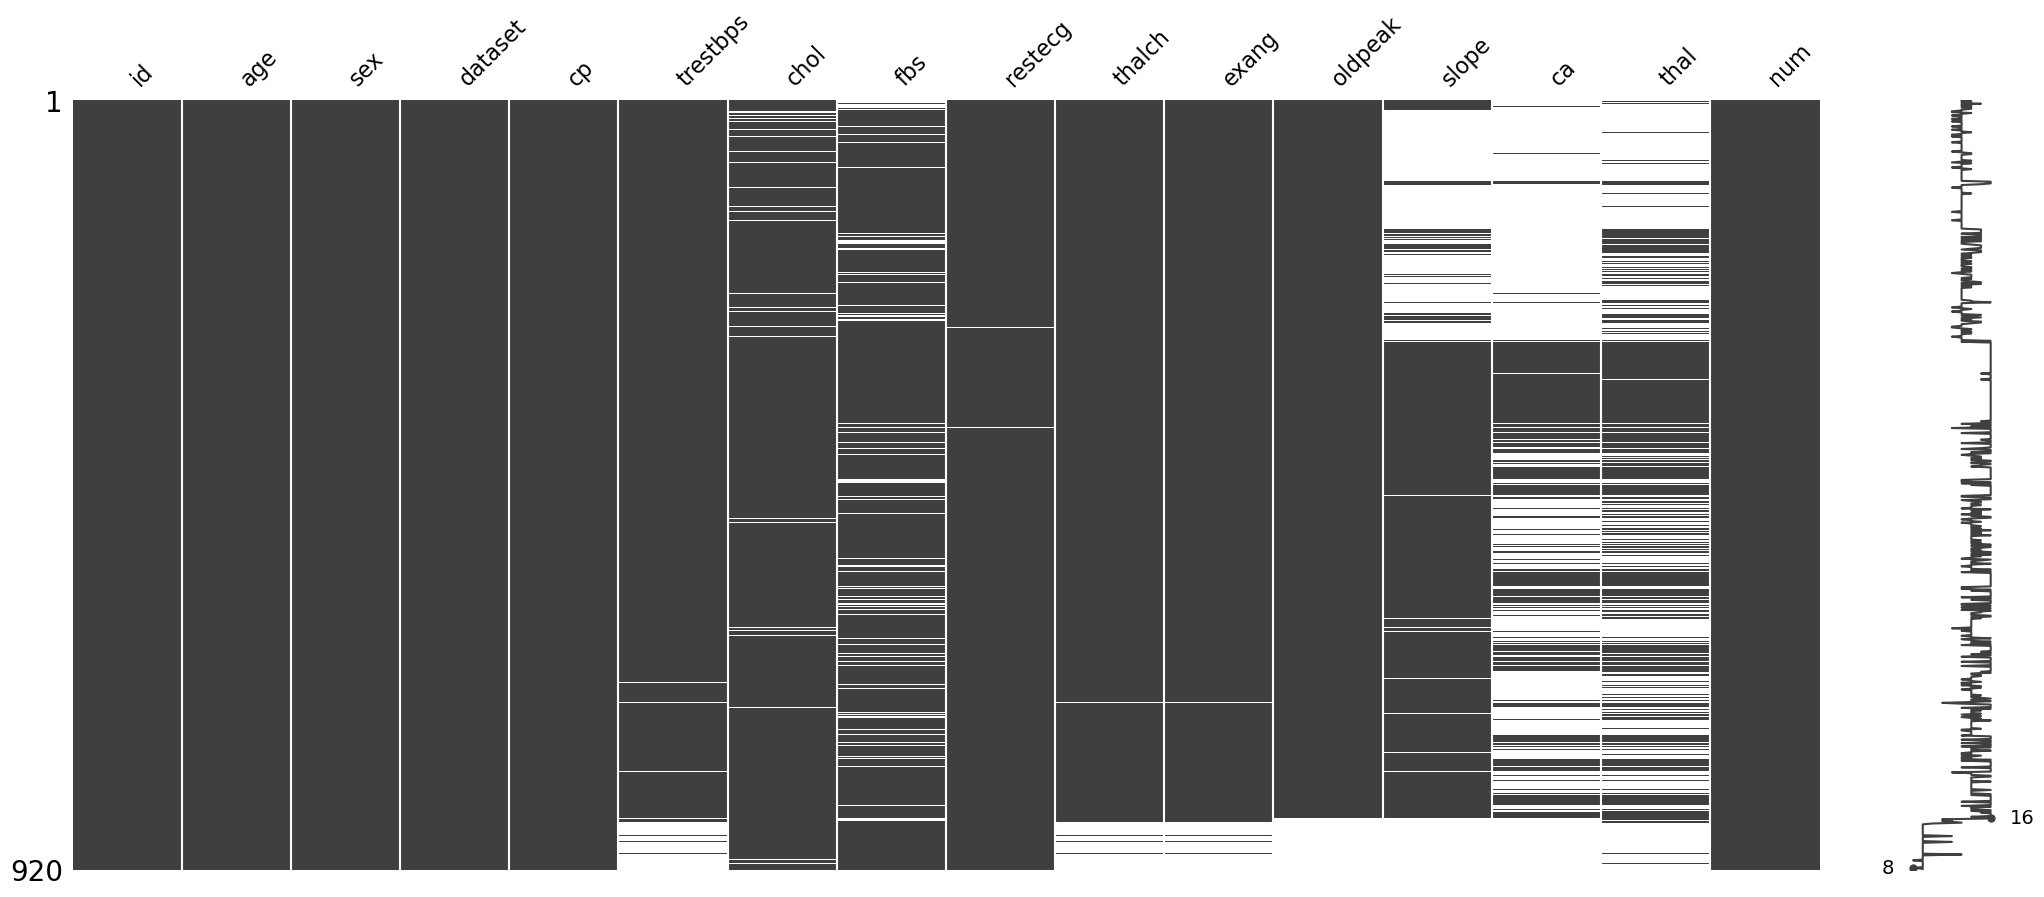

In [9]:
sorted = data.sort_values('oldpeak')
msno.matrix(sorted); plt.show()

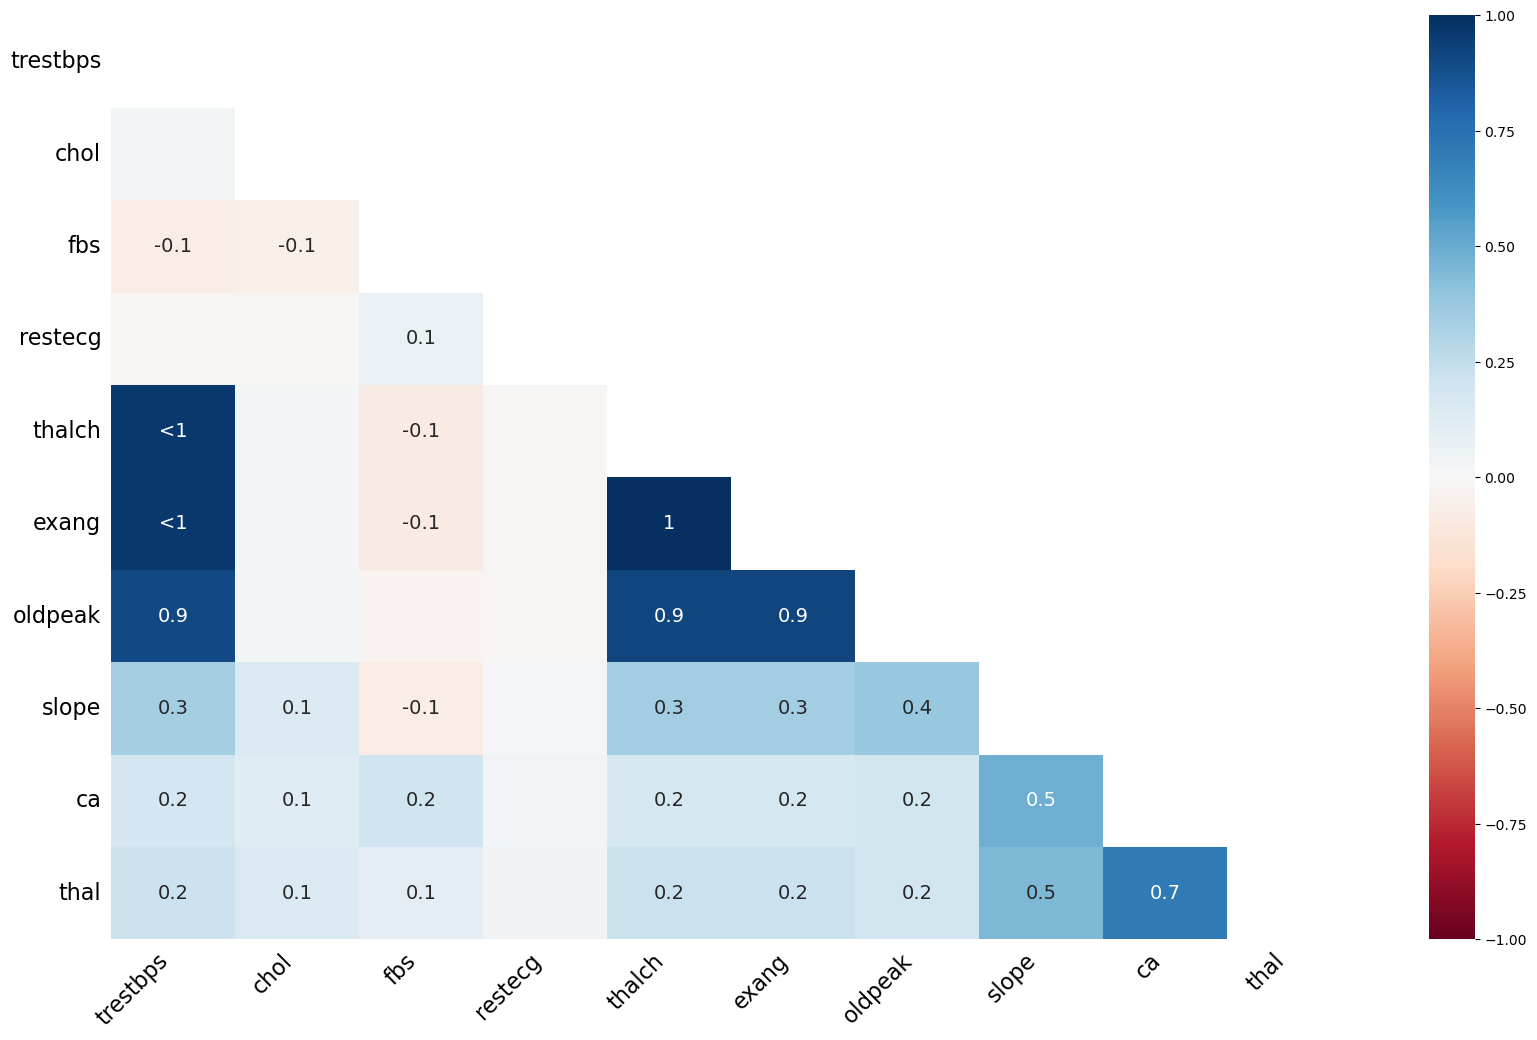

In [10]:
# Carte thérmique heat map de correlation:
msno.heatmap(data); plt.show()

### Que pouvez vous dire des 2 graphiques précédents ? À qoui ils servent ? <br>
- le premier permet de visualiser la répartition des valeurs manquantes pour chacune des variables <br>
- le deuxieme permet de visualiser le coefficient de corrélation des valeurs manquantes <br><br>
on observe forte corrélation entre trestbps et oldpeak,exang,thalch. ca et thal. thalch et exang

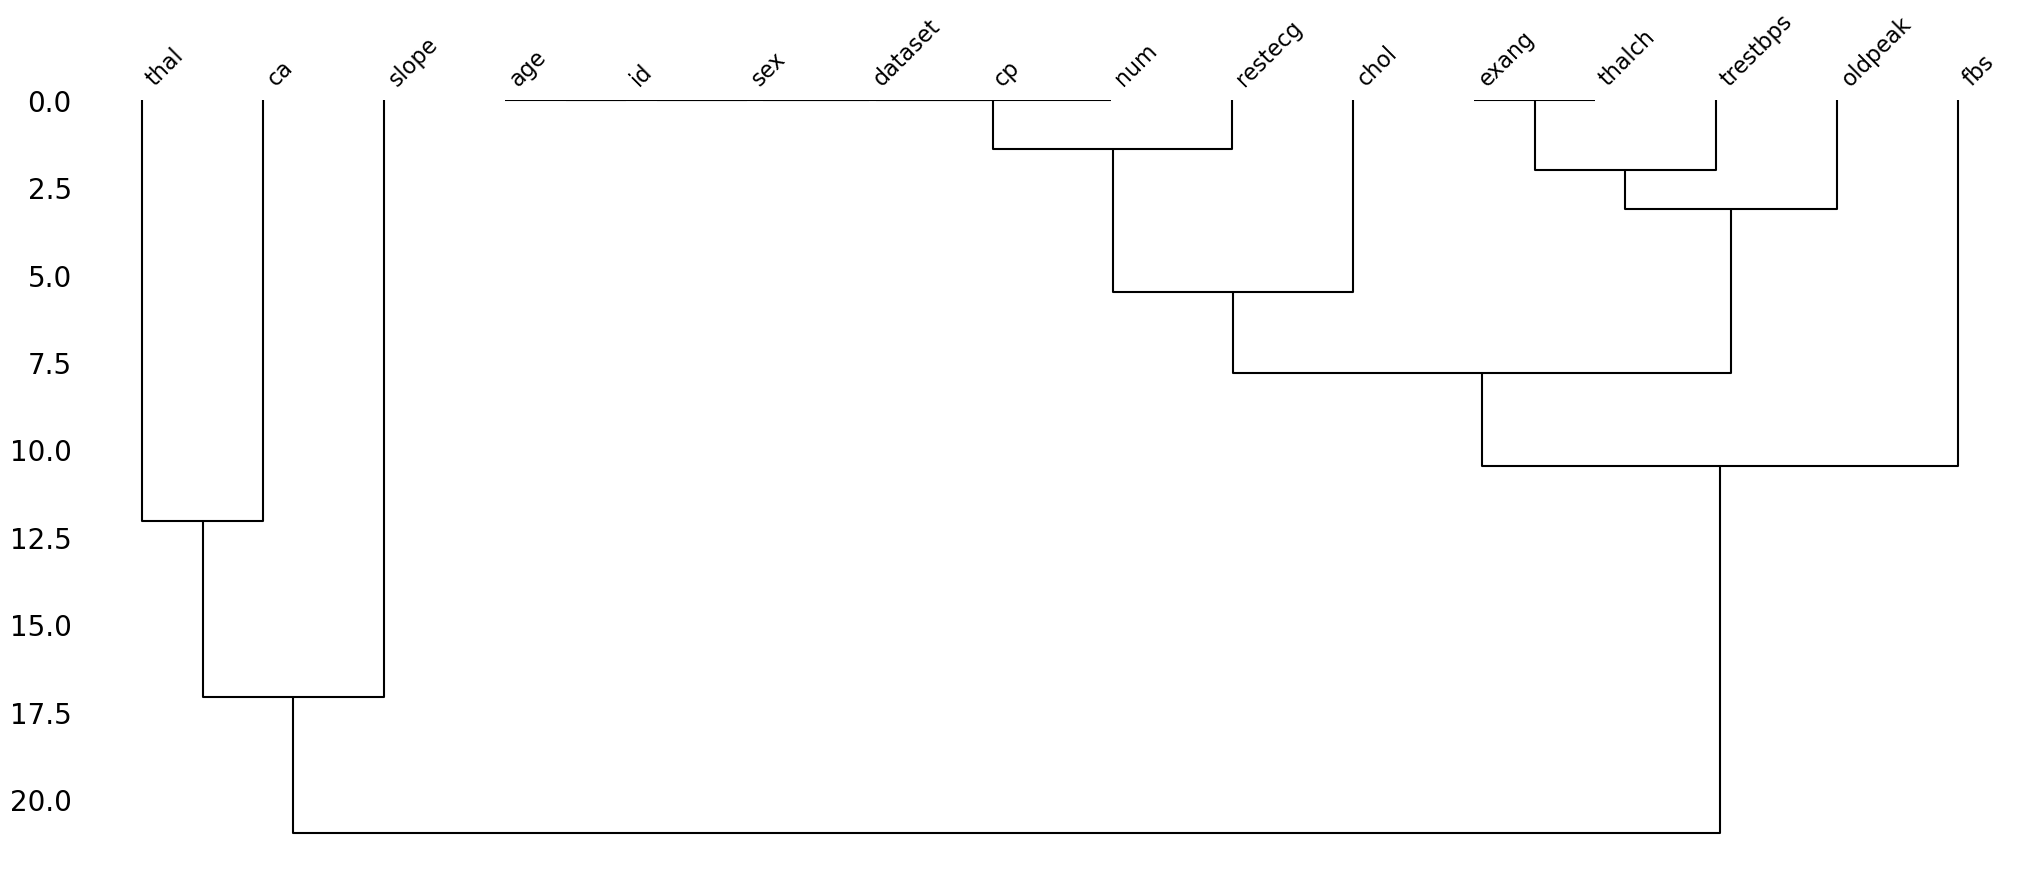

In [11]:
# Autre visualisation : le dendrogramme
msno.dendrogram(data); plt.show()

permet de visualiser comment les valeurs manquantes des différentes colonnes sont liées entre elles

#### Vouyez vous d’autrés corrélations ? Que pouvez vous dire de ces 2 groupes de corrélation ? <br>
- on vois que les variables age, id,sex, dataset,cp et num ont une corrélation null aves les autres variables.  
- on observe deux groupes fortement corrélés entre eux mais les deux groupes doivent etre analysées séparements 

### 5. Méthodes

#### Question : pour quoi XGBoost a été choisi pour cette étude ?<br>

XGBoost est plus précis que les autres models de performance.


In [24]:
def read_data():
    """
    Reads the 'Heart disease' dataset, performs some editing, and returns it.
    """

    df = pd.read_csv("../donnees/heart_disease_uci.csv")
    # ELLE FAIT QOUI CETTE INSTRUCTION ?
    # créer DataFrame pandas à partir du fichier csv
    
    df['num'] = df['num'].replace({2: 1, 3: 1, 4: 1})
    # ELLE FAIT QUOI CETTE INSTRUCTION ?
    # remplace les 2,3 et 4 par dans 1 dans la colonne 'num'. transforme cette colonne en binaire 
    # ( diagnosis of heart disease (angiographic disease status)
    # -- Value 0: < 50% diameter narrowing
    # -- Value 1: > 50% diameter narrowing)
    
    df = df.drop('id', axis=1)
    # ELLE FAIT QUI CETTE INSTRUCTION ?
    # supprime colonne 'id'
    
    df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda
    x: x.astype('category'))
    # ELLE FAIT QUOI CETTE INSTRUCTION ?
    #
    
    categorical_columns = df.select_dtypes(include=['category']).columns
    # Convert categorical to numerical
    label_encoder = LabelEncoder()
    # ELLE FAIT QUOI CETTE INSTRUCTION ?
    for column in categorical_columns:
        df[column] = label_encoder.fit_transform(df[column])
    return df